In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos de diabetes de sklearn
diabetes = load_diabetes()
X = diabetes.data  # Variables predictoras (10 características)
y = diabetes.target  # Variable objetivo (nivel de progresión de la enfermedad)

# Convertir a DataFrame para mejor visualización
column_names = diabetes.feature_names
df = pd.DataFrame(X, columns=column_names)

# Mostrar las primeras filas del dataset
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalizamos los datos

In [3]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir en DataFrame para mejor visualización
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(df_pca.head())

        PC1       PC2
0  0.587199 -1.946832
1 -2.831625  1.372082
2  0.272129 -1.634901
3  0.049281  0.382278
4 -0.756421  0.811960


In [4]:
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {explained_variance[0]:.2%}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.2%}")
print(f"Varianza explicada total: {sum(explained_variance):.2%}")

Varianza explicada por PC1: 40.24%
Varianza explicada por PC2: 14.92%
Varianza explicada total: 55.17%


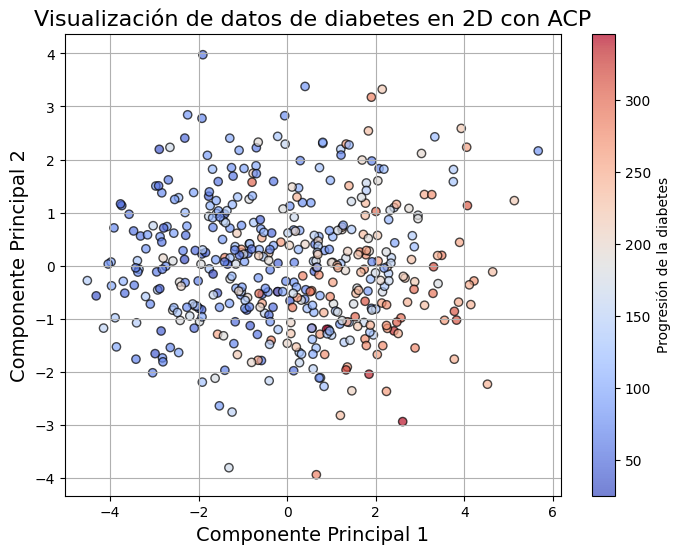

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel("Componente Principal 1", fontsize=14)
plt.ylabel("Componente Principal 2", fontsize=14)
plt.title("Visualización de datos de diabetes en 2D con ACP", fontsize=16)
plt.colorbar(label="Progresión de la diabetes")
plt.grid(True)
plt.show()

Varianza explicada por cada componente (3): [0.26179749 0.21640127 0.12870373]
Varianza explicada acumulada: 0.6069


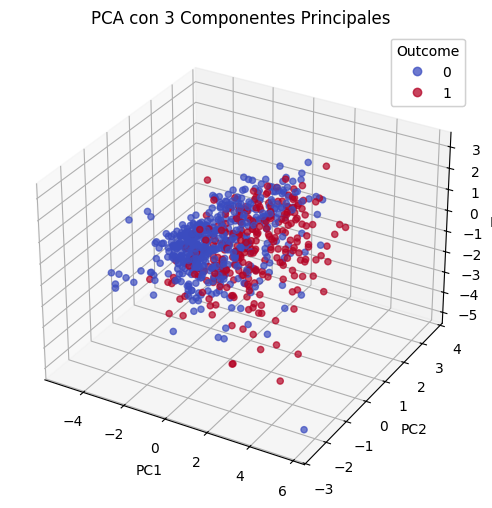

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D

# Cargar el dataset Pima Indians Diabetes (disponible en mlbench en R, en Python se obtiene desde Kaggle)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Nombres de las columnas según la documentación del dataset
column_names = ["NumPregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Cargar los datos en un DataFrame
df = pd.read_csv(url, names=column_names)

# Separar características (X) y la variable objetivo (y)
X = df.drop("Outcome", axis=1)  # Variables predictoras
y = df["Outcome"]  # Etiqueta (0: No diabetes, 1: Diabetes)

# Estandarizar los datos (PCA es sensible a la escala de los datos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 3 o 4 componentes principales
num_components = 3  # Cambiar a 4 si se quiere más reducción de dimensionalidad
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Explicar la varianza capturada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente ({num_components}): {explained_variance}")
print(f"Varianza explicada acumulada: {np.sum(explained_variance):.4f}")

# Graficar resultados
if num_components == 3:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='coolwarm', alpha=0.7)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA con 3 Componentes Principales")
    legend = plt.legend(*scatter.legend_elements(), title="Outcome")
    ax.add_artist(legend)
    plt.show()

elif num_components == 4:
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, num_components + 1), explained_variance * 100, tick_label=[f"PC{i}" for i in range(1, num_components + 1)])
    plt.xlabel("Componentes Principales")
    plt.ylabel("Varianza Explicada (%)")
    plt.title("Varianza Explicada por cada Componente Principal")
    plt.show()

Varianza explicada por cada componente (4): [0.26179749 0.21640127 0.12870373 0.10944113]
Varianza explicada acumulada: 0.7163


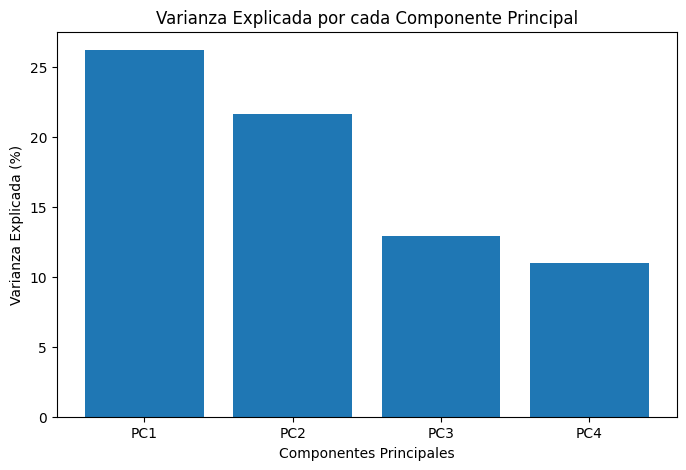

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D

# Cargar el dataset Pima Indians Diabetes (disponible en mlbench en R, en Python se obtiene desde Kaggle)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Nombres de las columnas según la documentación del dataset
column_names = ["NumPregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Cargar los datos en un DataFrame
df = pd.read_csv(url, names=column_names)

# Separar características (X) y la variable objetivo (y)
X = df.drop("Outcome", axis=1)  # Variables predictoras
y = df["Outcome"]  # Etiqueta (0: No diabetes, 1: Diabetes)

# Estandarizar los datos (PCA es sensible a la escala de los datos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 3 o 4 componentes principales
num_components = 4  # Cambiar a 4 si se quiere más reducción de dimensionalidad
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Explicar la varianza capturada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente ({num_components}): {explained_variance}")
print(f"Varianza explicada acumulada: {np.sum(explained_variance):.4f}")

# Graficar resultados
if num_components == 3:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='coolwarm', alpha=0.7)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA con 3 Componentes Principales")
    legend = plt.legend(*scatter.legend_elements(), title="Outcome")
    ax.add_artist(legend)
    plt.show()

elif num_components == 4:
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, num_components + 1), explained_variance * 100, tick_label=[f"PC{i}" for i in range(1, num_components + 1)])
    plt.xlabel("Componentes Principales")
    plt.ylabel("Varianza Explicada (%)")
    plt.title("Varianza Explicada por cada Componente Principal")
    plt.show()